In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [3]:
df.shape


(99492, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.describe()



,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [6]:
# what are the top 5 zip-codes from 911 calls?


df['zip'].value_counts().head(5)



19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
# what are the top 5 twp for emergency calling
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

110

In [9]:
x=df['title'][0]
x

'EMS: BACK PAINS/INJURY'

In [10]:
x.split(':')[0]

'EMS'

In [11]:
def reason(title):
    return title.split(":")[0]

In [12]:
df.insert(4,"Reason",df['title'].apply(reason))

In [13]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [14]:
## which is the most common reason for emergency calling
df['Reason'].value_counts()
## EMS is the most common reason

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

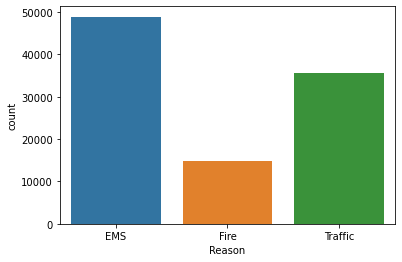

In [15]:
sns.countplot(x="Reason",data=df)

In [16]:
type(df['timeStamp'][0])


str

In [17]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [18]:
type(df['timeStamp'])

pandas.core.series.Series

In [19]:
x=df['timeStamp'][0]

In [20]:
x

Timestamp('2015-12-10 17:40:00')

In [21]:
x.year


2015

In [22]:

x.month


12

In [23]:
x.day_name()

'Thursday'

In [24]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)

In [25]:
df.head()


,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17


In [26]:
df['Month']=df['timeStamp'].apply(lambda x:x.month)

In [27]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12


In [28]:
df['Day']=df['timeStamp'].apply(lambda x:x.dayofweek)

In [29]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3


<AxesSubplot:xlabel='Day', ylabel='count'>

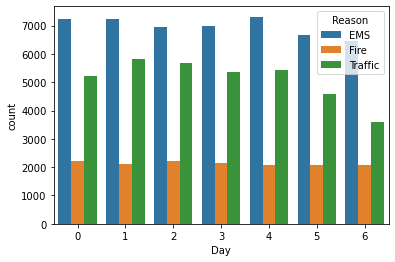

In [30]:
sns.countplot(x="Day",data=df,hue="Reason")

<AxesSubplot:xlabel='Month', ylabel='count'>

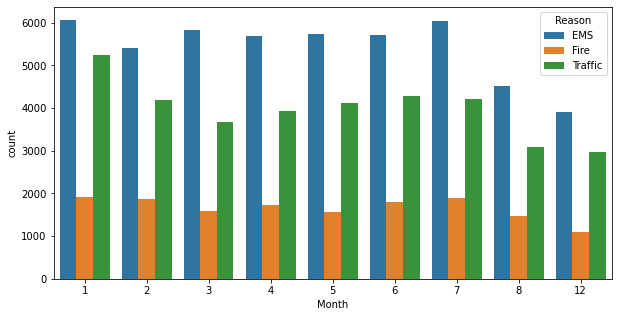

In [31]:

plt.figure(figsize=(10,5))
sns.countplot(x="Month",data=df,hue="Reason")


In [32]:
## 9,10,11 months are missing in countplot
df.groupby('Month')

In [33]:
bymonth=df.groupby('Month').count()
bymonth


,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7969,7963,7916,7969,7969,7969


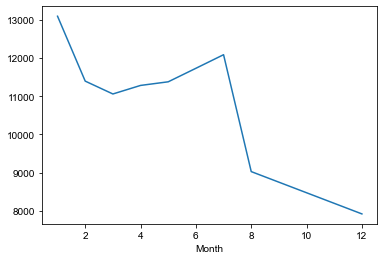

In [34]:
bymonth['addr'].plot()
sns.set_style('whitegrid')


In [35]:
## create a new column for a date\
df['Date']=df['timeStamp'].apply(lambda x:x.date())


In [36]:

df.head()


,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3,2015-12-10


In [37]:
bydate=df.groupby('Date').count()
bydate


,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,115,113,115,115,115,115
2015-12-11,396,396,396,333,396,396,396,395,391,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,403,401,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,319,317,319,319,319,319
2015-12-14,447,447,447,387,447,447,447,446,445,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,328,327,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,357,352,357,357,357,357
2016-08-22,389,389,389,336,389,389,389,388,384,389,389,389,389


In [38]:
## counts of calls per day based on various reason EMS,FIRE,TRAFFIC
df[df['Reason']=='EMS'].groupby('Date').count()


,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,159,159,159,139,159,159,159,159,159,159,159,159,159
2016-08-21,165,165,165,144,165,165,165,165,165,165,165,165,165
2016-08-22,182,182,182,163,182,182,182,182,182,182,182,182,182


Text(0.5, 1.0, 'EMS')

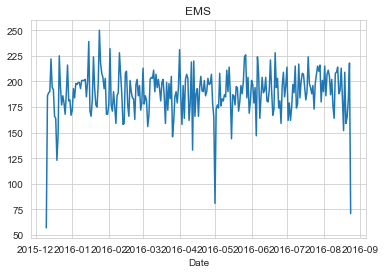

In [39]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')


In [40]:
df[df['Reason']=='Fire'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,69,68,68,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,39,38,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,52,52,52,47,52,52,52,52,52,52,52,52,52
2016-08-21,54,54,54,50,54,54,54,54,54,54,54,54,54
2016-08-22,51,51,51,46,51,51,51,50,50,51,51,51,51


Text(0.5, 1.0, 'Fire')

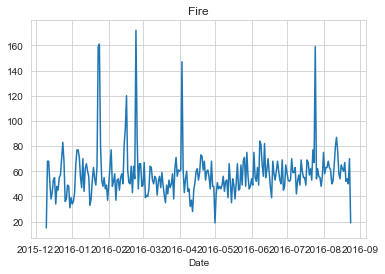

In [41]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')


In [42]:
df[df['Reason']=='Traffic'].groupby('Date').count()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,43,41,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,141,137,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,146,144,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,78,76,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,186,184,186,186,186,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,117,117,117,93,117,117,117,117,116,117,117,117,117
2016-08-21,138,138,138,105,138,138,138,138,133,138,138,138,138
2016-08-22,156,156,156,127,156,156,156,156,152,156,156,156,156


Text(0.5, 1.0, 'Traffic')

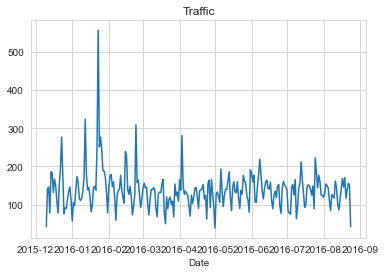

In [43]:

df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')


In [44]:
#unstack method to create a heat map
#reconstruct the dataframe so that columns becomes the hours and index becomes the day of week
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e,Hour,Month,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3,2015-12-10


In [46]:
df.groupby(['Day','Hour']).count()

lat  lng  desc  zip  Reason  title  timeStamp  twp  addr    e  \
Day Hour                                                                  
0   0     282  282   282  243     282    282        282  282   282  282   
    1     221  221   221  198     221    221        221  220   221  221   
    2     201  201   201  183     201    201        201  201   201  201   
    3     194  194   194  173     194    194        194  194   194  194   
    4     204  204   204  185     204    204        204  204   203  204   
...       ...  ...   ...  ...     ...    ...        ...  ...   ...  ...   
6   19    655  655   655  559     655    655        655  654   654  655   
    20    537  537   537  465     537    537        537  537   534  537   
    21    461  461   461  419     461    461        461  461   459  461   
    22    415  415   415  365     415    415        415  415   415  415   
    23    330  330   330  283     330    330        330  330   330  330   

          Month  Date  
Day Hour               
0   0       282   282  
    1       221   221  
    2       201   201  
    3       194   194  
    4       204   204  
...         ...   ...  
6   19      655   655  
    20      537   537  
    21      461   461  
    22      415   415  
    23      330   330  

[168 rows x 12 columns]

In [47]:
df.groupby(['Day','Hour']).count().unstack()

lat                                               ... Date             \
Hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16   
Day                                                     ...                   
0     282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
1     269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
2     250  216  189  209  156  255  410  701  875  808  ...  904  867   990   
3     278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
4     275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
5     375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
6     383  306  286  268  242  240  300  402  483  620  ...  684  691   663   

                                          
Hour    17   18   19   20   21   22   23  
Day                                       
0      997  885  746  613  497  472  325  
1     1019  905  731  647  571  462  274  
2     1037  894  686  668  575  490  335  
3     1013  810  698  617  553  424  354  
4      980  820  696  667  559  514  474  
5      757  778  696  628  572  506  467  
6      714  670  655  537  461  415  330  

[7 rows x 288 columns]

In [52]:
DayHour=df.groupby(['Day','Hour']).count()['Reason'].unstack()
DayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


<AxesSubplot:xlabel='Hour', ylabel='Day'>

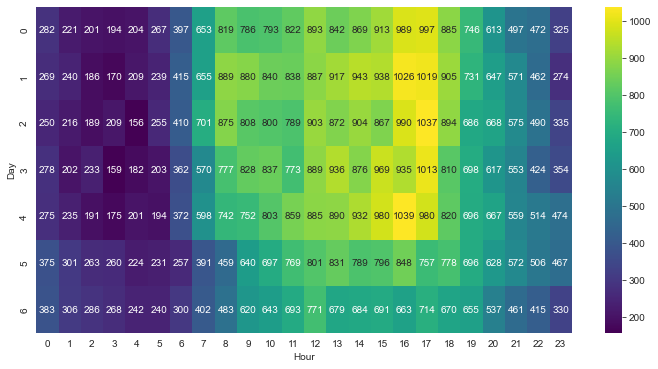

In [53]:
## create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(DayHour,annot=True,fmt='d',cmap='viridis')

In [54]:
DayMonth=df.groupby(['Day','Month']).count()['Reason'].unstack()
DayMonth

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065
5,2291,1441,1266,1734,1444,1388,1695,1099,978
6,1960,1229,1102,1488,1424,1333,1672,1021,907


<AxesSubplot:xlabel='Month', ylabel='Day'>

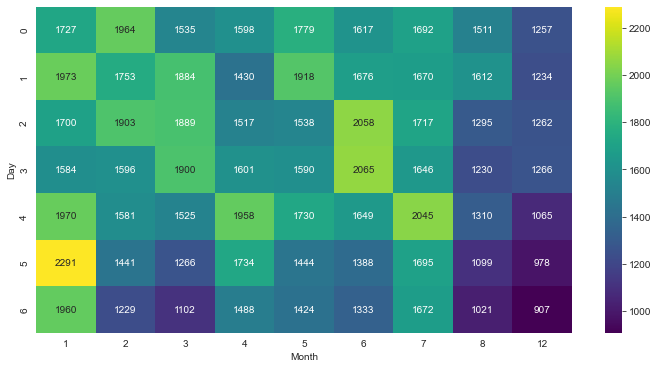

In [55]:
#create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(DayMonth,annot=True,fmt="d",cmap='viridis')

In [58]:

x=pd.pivot_table(df,index=["Day"],columns=['Hour'],values=["Reason"],aggfunc='count')

In [59]:
x.head()

Reason                                               ...                  \
Hour     0    1    2    3    4    5    6    7    8    9   ...   14   15    16   
Day                                                       ...                   
0       282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
1       269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
2       250  216  189  209  156  255  410  701  875  808  ...  904  867   990   
3       278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
4       275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   

                                          
Hour    17   18   19   20   21   22   23  
Day                                       
0      997  885  746  613  497  472  325  
1     1019  905  731  647  571  462  274  
2     1037  894  686  668  575  490  335  
3     1013  810  698  617  553  424  354  
4      980  820  696  667  559  514  474  

[5 rows x 24 columns]